In [1]:
%matplotlib notebook

# Dependencies
import json
import pprint
import requests
import sys
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

#api keys
from config_api import GEOCODE_API_KEY, YELP_API_KEY

#Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#references
#from lessons Evr_Tweet_Breaker #01-Lessons/07-Social-Analytics/01-Getting-Twitter-Data/04-Evr_Break_Tweet_JSON/Solved/Evr_Tweet_Breaker.ipynb
#from homework and articles s.o.f.
#https://stackoverflow.com/questions/17518937/saving-a-json-file-to-computer-python
#https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library
#https://github.com/Yelp/yelp-python
#https://www.programiz.com/python-programming/methods/string/count



In [3]:
#file operations

In [4]:
#functions
def load_json(jsonfile):
    """Load JSON from a file"""
    with open(jsonfile) as file_handle:
        return json.load(file_handle)
    
def milestometers(num_miles):
    #mtm = 1.609 * num_miles
    mtm = 1609.34 * num_miles
    mtm = int(mtm)
    return mtm

def meterstomiles(num_meters):
    mtm = num_meters / 1609.34
    mtm = round(mtm,2)
    return mtm

def getyelpreview(yelpid,API_KEY):
    review_url = f'https://api.yelp.com/v3/businesses/{yelpid}/reviews'
    review_headers = {'Authorization': 'Bearer {}'.format(API_KEY),}

    try:
        review_response = requests.get(review_url, headers=review_headers)
        review_responsetype = review_response.status_code
    
        review_data = review_response.json()
        
        #--testing--------->
        #print(response)
        #print(type(response.text))
        #print(response.text[:1000])
        #print(review_data)
        #<----end testing
        
        return review_data
    
    except:
        #print('EXCEPTION')
        return None

def getyelpbusiness(term,location,lat,lng,SEARCH_LIMIT,SEARCH_RADIUS,API_KEY):
    url = 'https://api.yelp.com/v3/businesses/search'

    headers = {
        'Authorization': 'Bearer {}'.format(API_KEY),
            }

    url_params = {
                'term': term.replace(' ', '+'),
                #'location': location.replace(' ', '+'),
                'latitude': lat,
                'longitude': lng,
                'radius': SEARCH_RADIUS,
                'limit': SEARCH_LIMIT
            }

    try:
        business_response = requests.get(url, headers=headers, params=url_params)
        business_data = business_response.json()
        
        #--testing--------->
        #print(response)
        #print(type(response.text))
        #print(response.text[:1000])
        #print(review_data)
        #<----end testing
        
        return business_data
    
    except:
        #print('EXCEPTION')
        return None

In [5]:
#logic 


In [6]:
#get coordinates by location name


origin_city = "Irvine,California"

#replacing spaces for HTML Encoding?
origin_city = origin_city.replace(" ","%20")

base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
location_name = "University of California Irvine"
input_name = location_name.replace(" ","%20")

input_url = "input=" + input_name
input_fields = "&inputtype=textquery&fields=photos,formatted_address,name,rating,opening_hours,geometry"
key_info = "&key="
target_url = f"{base_url}{input_url}{input_fields}{key_info}{GEOCODE_API_KEY}"


In [7]:
# Run a request to endpoint and convert result to json
uci_start_info = requests.get(target_url).json()

# Print the json
print(uci_start_info)

{'candidates': [{'formatted_address': 'Irvine, CA 92697, USA', 'geometry': {'location': {'lat': 33.6404952, 'lng': -117.8442962}, 'viewport': {'northeast': {'lat': 33.66208720000001, 'lng': -117.81300975}, 'southwest': {'lat': 33.625382, 'lng': -117.86935515}}}, 'name': 'University of California Irvine', 'photos': [{'height': 3024, 'html_attributions': ['<a href="https://maps.google.com/maps/contrib/103012318601018077697/photos">Sy Guo</a>'], 'photo_reference': 'CmRaAAAAXUeRADuwBzF7ziuA-D901V_QkcAOp_licxgIykgwXXpmABGXbZ4SPTphGGWpxc1nbuCB68fPEsmPfjDHGBwuVCPSYw_IiTCQSXodfvrb0aCgshpz8oTZuuiN0len4_OWEhCIGzpGxvYXmmEe8HPK_MyxGhQDVzz5voBKpUGXr0qhae6IaqyD7w', 'width': 4032}], 'rating': 4.2}], 'debug_log': {'line': []}, 'status': 'OK'}


In [8]:
#save json data
file_path = "data/"
file_name = "00_uci_start_latlon.json"
file_save = file_path + file_name

#from homework and articles s.o.f.
#https://stackoverflow.com/questions/17518937/saving-a-json-file-to-computer-python
#https://stackoverflow.com/questions/14114729/save-a-large-file-using-the-python-requests-library

#saving the file in case i get blocked due to over limit warnings again
with open(file_save, "w") as f:
    json.dump(uci_start_info, f)


In [9]:
#print out json file
print(json.dumps(uci_start_info, indent=4, sort_keys=True))

{
    "candidates": [
        {
            "formatted_address": "Irvine, CA 92697, USA",
            "geometry": {
                "location": {
                    "lat": 33.6404952,
                    "lng": -117.8442962
                },
                "viewport": {
                    "northeast": {
                        "lat": 33.66208720000001,
                        "lng": -117.81300975
                    },
                    "southwest": {
                        "lat": 33.625382,
                        "lng": -117.86935515
                    }
                }
            },
            "name": "University of California Irvine",
            "photos": [
                {
                    "height": 3024,
                    "html_attributions": [
                        "<a href=\"https://maps.google.com/maps/contrib/103012318601018077697/photos\">Sy Guo</a>"
                    ],
                    "photo_reference": "CmRaAAAAXUeRADuwBzF7ziuA-D901V_QkcAOp_licx

In [10]:
#get important information
location_info = uci_start_info["candidates"]
location_info

[{'formatted_address': 'Irvine, CA 92697, USA',
  'geometry': {'location': {'lat': 33.6404952, 'lng': -117.8442962},
   'viewport': {'northeast': {'lat': 33.66208720000001, 'lng': -117.81300975},
    'southwest': {'lat': 33.625382, 'lng': -117.86935515}}},
  'name': 'University of California Irvine',
  'photos': [{'height': 3024,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/103012318601018077697/photos">Sy Guo</a>'],
    'photo_reference': 'CmRaAAAAXUeRADuwBzF7ziuA-D901V_QkcAOp_licxgIykgwXXpmABGXbZ4SPTphGGWpxc1nbuCB68fPEsmPfjDHGBwuVCPSYw_IiTCQSXodfvrb0aCgshpz8oTZuuiN0len4_OWEhCIGzpGxvYXmmEe8HPK_MyxGhQDVzz5voBKpUGXr0qhae6IaqyD7w',
    'width': 4032}],
  'rating': 4.2}]

In [11]:
uci_coords = location_info[0]["geometry"]["location"]
#uci_coords

uci_lat = uci_coords["lat"]
uci_lng = uci_coords["lng"]

print(f"{uci_coords}")

print(f'LAT: {uci_lat} - LNG: {uci_lng}')

{'lat': 33.6404952, 'lng': -117.8442962}
LAT: 33.6404952 - LNG: -117.8442962


In [12]:
#Reverse Geocode for accurate address

#https://maps.googleapis.com/maps/api/geocode/json?latlng=33.6404952,-117.8442962&key=
addr_url = f"https://maps.googleapis.com/maps/api/geocode/json?latlng={uci_lat},{uci_lng}&key={GEOCODE_API_KEY}"
#print(addr_url)

In [13]:
#Run a request to endpoint and convert result to json
uci_addr_info = requests.get(addr_url).json()

# Print the json
#print(uci_addr_info)

In [14]:
#print out json file
print(json.dumps(uci_addr_info, indent=4, sort_keys=True))

{
    "plus_code": {
        "compound_code": "J5R4+57 Irvine, CA, USA",
        "global_code": "8554J5R4+57"
    },
    "results": [
        {
            "address_components": [
                {
                    "long_name": "10",
                    "short_name": "10",
                    "types": [
                        "street_number"
                    ]
                },
                {
                    "long_name": "Curie Court",
                    "short_name": "Curie Ct",
                    "types": [
                        "route"
                    ]
                },
                {
                    "long_name": "Irvine",
                    "short_name": "Irvine",
                    "types": [
                        "locality",
                        "political"
                    ]
                },
                {
                    "long_name": "Orange County",
                    "short_name": "Orange County",
                    "types"

In [15]:
uci_address = uci_addr_info["results"][0]["formatted_address"]

In [16]:
#create a dataframe to hold location information
uci_address_df = pd.DataFrame({"Location Name" : location_name
                              ,"Address" : uci_address
                              ,"lat" : uci_lat
                              ,"lng" : uci_lng
                              }, index=[0])

uci_address_df

,Location Name,Address,lat,lng
0,University of California Irvine,"10 Curie Ct, Irvine, CA 92617, USA",33.640495,-117.844296


In [17]:
#save the dataframe
uci_address_df.to_csv(file_path + "uciinfo.csv", header=True)

In [18]:
#store results in variables 
ulat = uci_address_df['lat']
ulng = uci_address_df['lng']
uname = uci_address_df['Location Name']
uaddress = uci_address_df['Address']

#define some business search variables
bus_term = 'Restaurants'
bus_location = 'Irvine, California'
bus_limit = 20
#set the search radius equal to 2 miles around the location
bus_radius = milestometers(2)


In [19]:
#get yelp business info with above requirements
yelp_info = getyelpbusiness(bus_term,bus_location,ulat,ulng,bus_limit,bus_radius,YELP_API_KEY)

In [20]:
print(json.dumps(yelp_info, indent=4, sort_keys=True))

{
    "businesses": [
        {
            "alias": "north-italia-irvine",
            "categories": [
                {
                    "alias": "pizza",
                    "title": "Pizza"
                },
                {
                    "alias": "italian",
                    "title": "Italian"
                }
            ],
            "coordinates": {
                "latitude": 33.67179,
                "longitude": -117.84507
            },
            "display_phone": "(949) 629-7060",
            "distance": 3477.2791238865525,
            "id": "NVB2X8t5Rie8S5AnzOnWJg",
            "image_url": "https://s3-media2.fl.yelpcdn.com/bphoto/TWL29M9UmLCIE1BZrXni8A/o.jpg",
            "is_closed": false,
            "location": {
                "address1": "2957 Michelson Dr",
                "address2": "",
                "address3": "",
                "city": "Irvine",
                "country": "US",
                "display_address": [
                    "2957

In [21]:
#view the main parts of the api get call
for x in yelp_info:
    print(x)
    
#from this we only want to know the details from the [businesses] item

businesses
total
region


In [22]:
#pull the data from the yelp api business call and build a list containing a dictionary object
restaurants = []
rest_info = {}

for restaurant in yelp_info["businesses"]:
    #print(restaurant["name"])
    
    #rest_type = restaurant["categories"][0]
    #rest_subtype = restaurant["categories"]
    
    #print(f'{rest_name} - {rest_type} - {rest_subtype}')   
    #print(f'{rest_subtype[0]}')   
    
    rest_name = restaurant["name"]
    
    #account for the number of possible categories, we only want a max of 2
    numlen = len(restaurant["categories"])
    #print(numlen)
    if numlen <1:
        rest_type = "n/a"
        rest_subtype = "n/a"
    elif numlen == 1:
        rest_type = restaurant["categories"][0]["title"]
        rest_subtype = "n/a"
    elif numlen > 1:
        rest_type = restaurant["categories"][0]["title"]
        rest_subtype = restaurant["categories"][1]["title"]
    else:
        rest_type = "n/a"
        rest_subtype = "n/a"
    
    rest_lat = restaurant["coordinates"]["latitude"]
    rest_lng = restaurant["coordinates"]["longitude"]
    
    rest_distance = restaurant["distance"]   
    #make sure its not zero
    #save meters and miles
    if rest_distance != None or rest_distance ==0:
        rest_distance_meters = int(rest_distance)
        rest_distance_miles = meterstomiles(rest_distance)

    else:
        rest_distance_meters = 0
        rest_distance_miles = 0
     
    rest_id = restaurant["id"]
    rest_addr1 = restaurant["location"]["address1"]
    rest_addr2 = restaurant["location"]["address2"]
    rest_city = restaurant["location"]["city"]
    rest_country = restaurant["location"]["country"]
    rest_state = restaurant["location"]["state"]
    rest_zip = restaurant["location"]["zip_code"]
    
    #rest_price = restaurant["price"]
    try:
        rest_price = restaurant["price"]
        rest_price_value = rest_price.count("$")
        #count = string.count(substring)
        #print(rest_price)
        
    except:
        #print('NO $')
        rest_price = 'NO $'
        rest_price_value = 0
    
    rest_rating = restaurant["rating"]
    rest_review = restaurant["review_count"]
    
    rest_info = {"yelpid":rest_id
                ,"name":rest_name
                ,"lat":rest_lat
                ,"lng":rest_lng
                ,"distance meters": rest_distance_meters
                ,"distance miles": rest_distance_miles
                ,"address1":rest_addr1
                ,"address2":rest_addr2
                ,"city":rest_city
                ,"state":rest_state
                ,"zip":rest_zip
                ,"price rating": rest_price
                ,"price value" : rest_price_value
                ,"review rating":rest_rating
                ,"review count": rest_review
                ,"type":rest_type
                ,"sub type":rest_subtype
                }
    restaurants.append(rest_info)
    
    #print(rest_addr1)
    #print(restaurant["location"])
    #print(rest_type)
    #rest_subtype

In [23]:
#build the dataframe 
restaurant_df = pd.DataFrame(restaurants)

In [24]:
#filter only the results for 1 mile due to our conversion formula might return results that
#are slightly higher due to the rounding/integer conversion
restaurant_df = restaurant_df.loc[restaurant_df["distance miles"]<=1]

In [25]:
#reorder the columns
restaurant_df = restaurant_df[['yelpid','name','lat','lng','distance miles','distance meters'
                               ,'price rating','price value','review count', 'review rating'
                              ,'type','sub type','address1','city','state','zip']]
#.set_index('id',[0])
restaurant_df = restaurant_df.reset_index()
restaurant_df.head(3)

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,1,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,2,UyQiOlHYL6AjMrr_Q8ty1Q,The Stand,33.637546,-117.860111,0.92,1477,$$,2,185,4.5,American (New),Burgers,1332 Bison Ave,Newport Beach,CA,92660
2,3,kgR9KrpmqrwJeKmyKnEA0Q,Eddie V's Prime Seafood,33.637768,-117.861074,0.98,1582,$$$,3,1335,4.5,Seafood,Steakhouses,1370 Bison Ave,Newport Beach,CA,92660


In [26]:
#check the columns
restaurant_df.columns

Index(['index', 'yelpid', 'name', 'lat', 'lng', 'distance miles',
       'distance meters', 'price rating', 'price value', 'review count',
       'review rating', 'type', 'sub type', 'address1', 'city', 'state',
       'zip'],
      dtype='object')

In [27]:
#check the number of results
print(len(restaurant_df))

12


In [28]:
#output the sentiments to csv
restaurant_df.to_csv(file_path + "uci_yelp_businesses.csv", header=True)

In [29]:
#set a variable to loop through the businesses by id
#yelpid_data = restaurant_df["yelpid"]
#print(yelpid_data)

#setup some variables for the reviews
yelp_reviews = []
reviews_info = {}

In [30]:
#-----VADER-->
vader_results = []
#<----END VADER


for index, row in restaurant_df.iterrows():
        
    #-----VADER-->
    com_ls = []
    pos_ls = []
    neg_ls = []
    neu_ls = []
    #<----END VADER
    
    #iterate through df
    
    #get the id
    yid = row[1]
    #print(f'{index}: {yid}')
    #restaurant name
    yname = row[2]
    
    #call our yelpfunc and sleep it for 2 seconds
    yreview = getyelpreview(yid,YELP_API_KEY)
    #print(yreview)
    #time.sleep(2)
    
    for review in yreview["reviews"]:
        
        #the restaurant id we will be using to join on later
        rest_id = yid
        
        ls_review_id = review["id"]
        ls_review_rating = review["rating"]
        ls_review_text = review["text"]
        ls_review_timestamp = review["time_created"]
        
        #add yelp review name and review id
        ls_review_name = review["user"]["name"]
        ls_review_reviewerid = review["user"]["id"]
        
        
        #check to see if we have text to parse
        #print(ls_review_text)
        
        #--->VADER
        
        #run vader analysis on each text
        results = analyzer.polarity_scores(ls_review_text)
        com = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]
       
        #add each value to each list
        com_ls.append(com)
        pos_ls.append(pos)
        neg_ls.append(neg)
        neu_ls.append(neu)
        #--------END VADER
        

        reviews_info = {"yelpid":rest_id
                        ,"reviewid": ls_review_id
                        ,"review text": ls_review_text
                        ,"timestamp": ls_review_timestamp
                        ,"reviewer name": ls_review_name
                        ,"reviewer id": ls_review_reviewerid
                        ,"compound" : com
                        ,"positive" : pos
                        ,"negative" : neg
                        ,"neutral" : neu
                       }
        yelp_reviews.append(reviews_info)
        
    #sentiment results
    user_results = {"Restaurant": yname
                    ,"Compound Score": np.mean(com_ls)
                    ,"Postive Score": np.mean(pos_ls)
                    ,"Negative Score": np.mean(neg_ls)
                    ,"Neutral Score": np.mean(neu_ls)
                   }
    vader_results.append(user_results)
        
print(f'Compound: {com_ls} or {com}')


Compound: [0.4767, -0.5204, 0.8074] or 0.8074


In [31]:
#view the vader results
#print(vader_results)

#create a sentiment dataframe
sentiments_pd = pd.DataFrame.from_dict(vader_results)
sentiments_pd

,Compound Score,Negative Score,Neutral Score,Postive Score,Restaurant
0,0.725333,0.021333,0.758667,0.220333,Thai Style
1,0.000000,0.043667,0.912333,0.043667,The Stand
2,0.647333,0.000000,0.757333,0.242667,Eddie V's Prime Seafood
3,0.173267,0.109333,0.746000,0.144667,Asian Box
4,0.408433,0.044667,0.816333,0.139000,Hen House Grill
5,0.206333,0.025000,0.862333,0.112667,Slapfish
6,0.586067,0.000000,0.787333,0.212667,Spoleto
7,0.672800,0.000000,0.796333,0.203667,Eureka!
8,0.531633,0.047000,0.735000,0.218333,Mendocino Farms
9,0.772000,0.000000,0.762667,0.237333,Taco Rosa


In [32]:
#output the sentiments to csv
sentiments_pd.to_csv(file_path + "uci_yelp_sentiments.csv", header=True)

In [33]:
#clear the results for testing
#reviews_df = None
#yelp_reviews = None
#yelp_reviews

In [34]:
#build the dataframe and reorder the columns
reviews_df = pd.DataFrame(yelp_reviews)
reviews_df.head(5)

,compound,negative,neutral,positive,review text,reviewer id,reviewer name,reviewid,timestamp,yelpid
0,0.7506,0.064,0.669,0.268,Good weekly Thai food @our Farmer's Market on ...,-2CainXEr63oltxnExHGgg,Randy W.,iP-ARrjqnobZSf34oQFJpg,2017-07-27 12:21:45,Ut9709JWjLlx9CYyTjYYKg
1,0.6542,0.000,0.840,0.160,I agree with other yelpers saying the wait can...,Nl7_kl_3QbEexPFud0xobg,An L.,_odtz8ELynWfQXTdT1oc3Q,2018-03-01 15:43:14,Ut9709JWjLlx9CYyTjYYKg
2,0.7712,0.000,0.767,0.233,Legit ! I wish they had a restaurant because I...,7ymjgHryA31FIrKsm9KyXA,Michael D.,l1zsiDmhiz45pqsouMDTkg,2018-03-20 16:15:59,Ut9709JWjLlx9CYyTjYYKg
3,0.0000,0.000,1.000,0.000,If you read nothing else. Read this! I will wo...,9DbqFyZVprElAhDZf4HI5A,Khashayer M.,Mebo05nblZ5314uLsDhXaA,2018-08-20 16:22:45,UyQiOlHYL6AjMrr_Q8ty1Q
4,0.0000,0.000,1.000,0.000,Two stars for the guacamole in my salad. Liter...,1G0EvYpydNI6PbzEMCsSXQ,Tejal K.,Z78vucUptlcJbvrwViy2PA,2018-09-08 16:47:24,UyQiOlHYL6AjMrr_Q8ty1Q


In [35]:
#view column info
reviews_df.columns

Index(['compound', 'negative', 'neutral', 'positive', 'review text',
       'reviewer id', 'reviewer name', 'reviewid', 'timestamp', 'yelpid'],
      dtype='object')

In [36]:
reviews_df = reviews_df[['yelpid','reviewid','compound','positive','negative','neutral','review text','timestamp','reviewer name','reviewer id']]
reviews_df = reviews_df.reset_index()
reviews_df.head(3)

,index,yelpid,reviewid,compound,positive,negative,neutral,review text,timestamp,reviewer name,reviewer id
0,0,Ut9709JWjLlx9CYyTjYYKg,iP-ARrjqnobZSf34oQFJpg,0.7506,0.268,0.064,0.669,Good weekly Thai food @our Farmer's Market on ...,2017-07-27 12:21:45,Randy W.,-2CainXEr63oltxnExHGgg
1,1,Ut9709JWjLlx9CYyTjYYKg,_odtz8ELynWfQXTdT1oc3Q,0.6542,0.160,0.000,0.840,I agree with other yelpers saying the wait can...,2018-03-01 15:43:14,An L.,Nl7_kl_3QbEexPFud0xobg
2,2,Ut9709JWjLlx9CYyTjYYKg,l1zsiDmhiz45pqsouMDTkg,0.7712,0.233,0.000,0.767,Legit ! I wish they had a restaurant because I...,2018-03-20 16:15:59,Michael D.,7ymjgHryA31FIrKsm9KyXA


In [37]:
#save df
reviews_df.to_csv(file_path + "uci_yelp_reviews_main.csv", header=True)

In [38]:
#merge both dataframes
#https://stackoverflow.com/questions/18792918/combine-two-pandas-data-frames-join-on-a-common-column
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer')
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer', suffixes=('_restaurant_id', '_restaurant_review'))

reviews_merged_df = pd.merge(restaurant_df, reviews_df, on='yelpid', how="outer")

#removing merged indexes
del reviews_merged_df["index_x"]
del reviews_merged_df["index_y"]

#setting the df to our cleaned df
reviews_merged_df = reviews_merged_df

#resetting the index
reviews_merged_df = reviews_merged_df.reset_index(drop=True)

reviews_merged_df.head(1)
#new_df = None

,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,...,zip,reviewid,compound,positive,negative,neutral,review text,timestamp,reviewer name,reviewer id
0,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,...,92617,iP-ARrjqnobZSf34oQFJpg,0.7506,0.268,0.064,0.669,Good weekly Thai food @our Farmer's Market on ...,2017-07-27 12:21:45,Randy W.,-2CainXEr63oltxnExHGgg


In [39]:
#save df
reviews_merged_df.to_csv(file_path + "uci_yelp_reviews_merged.csv", header=True)

In [40]:
#get the columns
reviews_merged_df.columns

Index(['yelpid', 'name', 'lat', 'lng', 'distance miles', 'distance meters',
       'price rating', 'price value', 'review count', 'review rating', 'type',
       'sub type', 'address1', 'city', 'state', 'zip', 'reviewid', 'compound',
       'positive', 'negative', 'neutral', 'review text', 'timestamp',
       'reviewer name', 'reviewer id'],
      dtype='object')

In [41]:
#define unique restauraunts
restsnum = reviews_merged_df.index.unique()
print(f'{len(restsnum)} restsnum \n{restsnum}')

36 restsnum 
Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64')


In [42]:
#bar chart
sentiments_pd

,Compound Score,Negative Score,Neutral Score,Postive Score,Restaurant
0,0.725333,0.021333,0.758667,0.220333,Thai Style
1,0.000000,0.043667,0.912333,0.043667,The Stand
2,0.647333,0.000000,0.757333,0.242667,Eddie V's Prime Seafood
3,0.173267,0.109333,0.746000,0.144667,Asian Box
4,0.408433,0.044667,0.816333,0.139000,Hen House Grill
5,0.206333,0.025000,0.862333,0.112667,Slapfish
6,0.586067,0.000000,0.787333,0.212667,Spoleto
7,0.672800,0.000000,0.796333,0.203667,Eureka!
8,0.531633,0.047000,0.735000,0.218333,Mendocino Farms
9,0.772000,0.000000,0.762667,0.237333,Taco Rosa


In [43]:
#vs_xaxis = sentiments_pd["Restaurant"].values
#vs_yaxis = sentiments_pd["Compound Score"].values

In [44]:
"""
plt.figure(figsize=(6,4))

#add the colors
plt.bar(oaxis, overall_yaxis, color="r")

#add tick values
plt.xticks(oaxis, xticks)

#add a line on zero
plt.axhline(y=0, color = 'blue')

plt.title(barsent_title)

plt.xlabel("Media Types")

plt.ylabel(barsent_ylabel)
"""

'\nplt.figure(figsize=(6,4))\n\n#add the colors\nplt.bar(oaxis, overall_yaxis, color="r")\n\n#add tick values\nplt.xticks(oaxis, xticks)\n\n#add a line on zero\nplt.axhline(y=0, color = \'blue\')\n\nplt.title(barsent_title)\n\nplt.xlabel("Media Types")\n\nplt.ylabel(barsent_ylabel)\n'

In [45]:
#get yelp business info with above requirements
max_info = getyelpbusiness(bus_term,bus_location,ulat,ulng,50,bus_radius,YELP_API_KEY)

In [46]:
print(max_info)
    

{'businesses': [{'id': 'NVB2X8t5Rie8S5AnzOnWJg', 'alias': 'north-italia-irvine', 'name': 'North Italia', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/TWL29M9UmLCIE1BZrXni8A/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/north-italia-irvine?adjust_creative=CLqyfh1-3PMwCsBNuGANNA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=CLqyfh1-3PMwCsBNuGANNA', 'review_count': 2210, 'categories': [{'alias': 'pizza', 'title': 'Pizza'}, {'alias': 'italian', 'title': 'Italian'}], 'rating': 4.5, 'coordinates': {'latitude': 33.67179, 'longitude': -117.84507}, 'transactions': [], 'price': '$$', 'location': {'address1': '2957 Michelson Dr', 'address2': '', 'address3': '', 'city': 'Irvine', 'zip_code': '92612', 'country': 'US', 'state': 'CA', 'display_address': ['2957 Michelson Dr', 'Irvine, CA 92612']}, 'phone': '+19496297060', 'display_phone': '(949) 629-7060', 'distance': 3477.2791238865525}, {'id': 'Ut9709JWjLlx9CYyTjYYKg', 'alias': 'thai-style-irvine', 'na

In [47]:
for x in max_info:
    print(x)

businesses
total
region


In [48]:
restaurant_df

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,1,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,2,UyQiOlHYL6AjMrr_Q8ty1Q,The Stand,33.637546,-117.860111,0.92,1477,$$,2,185,4.5,American (New),Burgers,1332 Bison Ave,Newport Beach,CA,92660
2,3,kgR9KrpmqrwJeKmyKnEA0Q,Eddie V's Prime Seafood,33.637768,-117.861074,0.98,1582,$$$,3,1335,4.5,Seafood,Steakhouses,1370 Bison Ave,Newport Beach,CA,92660
3,5,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,285,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612
4,6,lzx8_1F8TqC9y8L3ElRifg,Hen House Grill,33.649303,-117.832297,0.92,1480,$$,2,746,4.0,Persian/Iranian,Mediterranean,4515 Campus Dr,Irvine,CA,92612
5,7,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
6,10,RcWSCtCaDcn9FPZwM0AQrg,Spoleto,33.651059,-117.839014,0.79,1272,$$,2,280,4.0,Italian,Salad,4175 Campus Dr,Irvine,CA,92612
7,11,pm1SGfjnSDIDw-1W1XbCSQ,Eureka!,33.650563,-117.839237,0.75,1213,$$,2,800,3.5,American (New),Bars,4143 Campus Dr,Irvine,CA,92612
8,12,jTyfj3e8PIkc4KTVh3sAqw,Mendocino Farms,33.650802,-117.839104,0.77,1242,$$,2,479,4.0,Sandwiches,Salad,4187 Campus Dr,Irvine,CA,92612
9,16,I5hqwi5SRlFmdam78sa2HA,Taco Rosa,33.627031,-117.849114,0.97,1562,$$,2,439,3.5,Mexican,Beer Bar,2632 San Miguel Dr,Newport Beach,CA,92660


In [49]:
# Value $ DataFrame
value_1 = restaurant_df[restaurant_df['price value'] == 1]
value_1

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
3,5,z6ZyXlSfhftN-h7FfAJo6Q,Asian Box,33.648806,-117.832066,0.91,1461,$,1,285,4.0,Asian Fusion,Vegan,4503 Campus Dr,Irvine,CA,92612
10,18,QzJxZ67PVrqy6Z_5gKfxyw,Le Diplomate Cafe,33.649141,-117.839279,0.75,1210,$,1,1713,4.5,Bakeries,Sandwiches,4237 Campus Dr,Irvine,CA,92612
11,19,jhA6AtQuXJT_dJPb7QGGxQ,Anthill Pub & Grille,33.648875,-117.842284,0.59,950,$,1,380,4.0,Bars,American (Traditional),4200 Campus Dr,Irvine,CA,92697


In [50]:
# Value $$ Dataframe
value_2 = restaurant_df[restaurant_df['price value'] == 2]
value_2

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
0,1,Ut9709JWjLlx9CYyTjYYKg,Thai Style,33.640992,-117.855753,0.66,1062,$$,2,4,4.5,Thai,Food Stands,5171 California Ave,Irvine,CA,92617
1,2,UyQiOlHYL6AjMrr_Q8ty1Q,The Stand,33.637546,-117.860111,0.92,1477,$$,2,185,4.5,American (New),Burgers,1332 Bison Ave,Newport Beach,CA,92660
4,6,lzx8_1F8TqC9y8L3ElRifg,Hen House Grill,33.649303,-117.832297,0.92,1480,$$,2,746,4.0,Persian/Iranian,Mediterranean,4515 Campus Dr,Irvine,CA,92612
5,7,TJljvcQrbgaHyrWRTJDSJA,Slapfish,33.649810,-117.838780,0.72,1166,$$,2,630,4.0,Seafood,Fish & Chips,4249 Campus Dr,Irvine,CA,92612
6,10,RcWSCtCaDcn9FPZwM0AQrg,Spoleto,33.651059,-117.839014,0.79,1272,$$,2,280,4.0,Italian,Salad,4175 Campus Dr,Irvine,CA,92612
7,11,pm1SGfjnSDIDw-1W1XbCSQ,Eureka!,33.650563,-117.839237,0.75,1213,$$,2,800,3.5,American (New),Bars,4143 Campus Dr,Irvine,CA,92612
8,12,jTyfj3e8PIkc4KTVh3sAqw,Mendocino Farms,33.650802,-117.839104,0.77,1242,$$,2,479,4.0,Sandwiches,Salad,4187 Campus Dr,Irvine,CA,92612
9,16,I5hqwi5SRlFmdam78sa2HA,Taco Rosa,33.627031,-117.849114,0.97,1562,$$,2,439,3.5,Mexican,Beer Bar,2632 San Miguel Dr,Newport Beach,CA,92660


In [51]:
# Value $$$ DataFrame
value_3 = restaurant_df[restaurant_df['price value'] == 3]
value_3

,index,yelpid,name,lat,lng,distance miles,distance meters,price rating,price value,review count,review rating,type,sub type,address1,city,state,zip
2,3,kgR9KrpmqrwJeKmyKnEA0Q,Eddie V's Prime Seafood,33.637768,-117.861074,0.98,1582,$$$,3,1335,4.5,Seafood,Steakhouses,1370 Bison Ave,Newport Beach,CA,92660


Bubble Plot Distance, Value, Rating

<IPython.core.display.Javascript object>


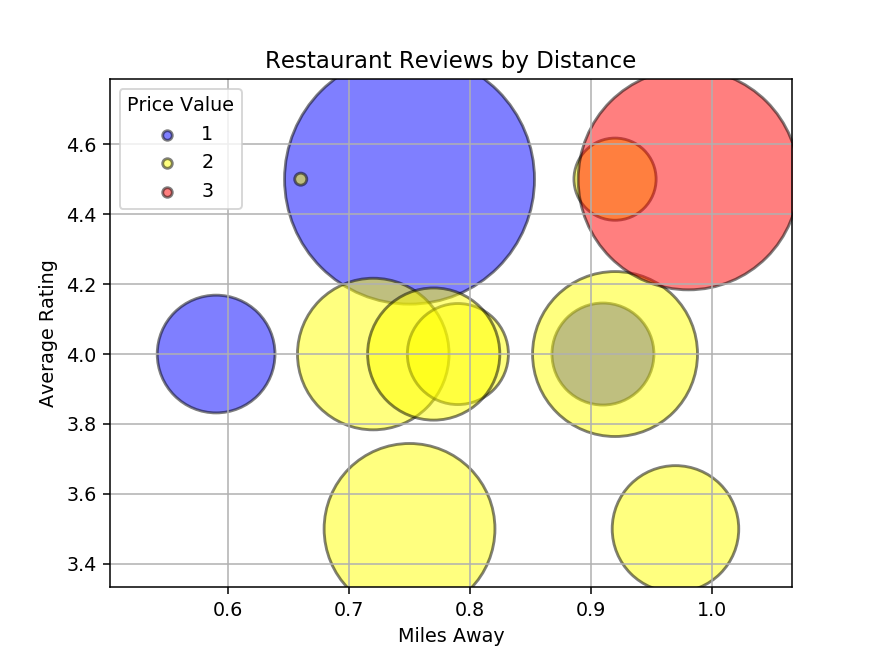

In [66]:
# Build the scatter plots for each value type

plt.scatter(value_1["distance miles"], value_1["review rating"], 
            color = "blue", edgecolors="black", s = value_1["review count"]*10, 
            label = "1", alpha = 0.5, linewidth = 1.5)
plt.scatter(value_2["distance miles"], value_2["review rating"], 
            color = "yellow", edgecolors="black", s = value_2["review count"]*10, 
            label = "2", alpha = 0.5, linewidth = 1.5)
plt.scatter(value_3["distance miles"], value_3["review rating"], 
            color = "red", edgecolors="black", s = value_3["review count"]*10, 
            label = "3", alpha = 0.5, linewidth = 1.5)
plt.xlabel('Miles Away')
plt.ylabel('Average Rating')
plt.title('Restaurant Reviews by Distance')
bubble_lgnd = plt.legend(title = 'Price Value', loc="best")
bubble_lgnd.legendHandles[0]._sizes=[25]
bubble_lgnd.legendHandles[1]._sizes=[25]
bubble_lgnd.legendHandles[2]._sizes=[25]
plt.grid(True)
#plt.savefig("rating by distance.jpg")
plt.show()

Pie Chart by Value

In [60]:
# % of restaurants by Value
rest_value = restaurant_df.groupby(["price value"]).count()["type"]
rest_value

price value
1    3
2    8
3    1
Name: type, dtype: int64

In [61]:
# Labels for the sections of our pie chart
labels = ["1", "2", "3"]

# The values of each section of the pie chart
sizes = [rest_value]

# The colors of each section of the pie chart
colors = ["blue", "yellow", "red"]

#Explode Low budget
explode = (0.1, 0, 0)

In [62]:
# Show Figure
plt.title("Restaurants by Price Value")
plt.pie(rest_value, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.axis("equal")

#Save Plot
#plt.savefig("rest_value.jpg")
plt.show()

Pie Chart by Rating

In [63]:
# % of restaurants by Value
rest_rating = restaurant_df.groupby(["review rating"]).count()["type"]
rest_rating

review rating
3.5    2
4.0    6
4.5    4
Name: type, dtype: int64

In [64]:
# Labels for the sections of our pie chart
labels = ["3.5", "4.0", "4.5"]

# The values of each section of the pie chart
sizes = [rest_rating]

# The colors of each section of the pie chart
colors = ["blue", "yellow", "red"]

#Explode Low budget
explode = (0.1, 0, 0)

In [65]:
# Show Figure
plt.title("Restaurants by Review Rating")
plt.pie(rest_rating, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=120)
plt.axis("equal")

#Save Plot
#plt.savefig("rest_value.jpg")
plt.show()